### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Dataset Analysis and Cleanup

In [7]:
cali.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#Transform ocean_proximity assign it to ca here:
ca=pd.get_dummies(cali, prefix=['ocean_proximity'])

In [9]:
# fill missing total bedroom sqft in ca
ratio = ca['total_bedrooms'].mean()/ca['total_rooms'].mean()
ca['total_bedrooms'] = ca['total_bedrooms'].fillna(ratio * ca['total_rooms'])

In [10]:
# Minimize footprint on median_house_value for higher degrees of model
ca['median_house_value'] = ca['median_house_value']/1000

In [11]:
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.720825,1425.476744,499.539680,3.870671,206.855817,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,420.849609,1132.462122,382.329753,1.899822,115.395616,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179.700000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264.725000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# correlation to identify redundant columns
ca.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068436,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066125,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.321475,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930863,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.068436,-0.066125,-0.321475,0.930863,1.000000,0.877457,0.978737,-0.005665,0.051308,0.018907,-0.007090,-0.004340,-0.019245,0.000062
population,0.099773,-0.108785,-0.296244,0.857126,0.877457,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.978737,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.005665,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.051308,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018907,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

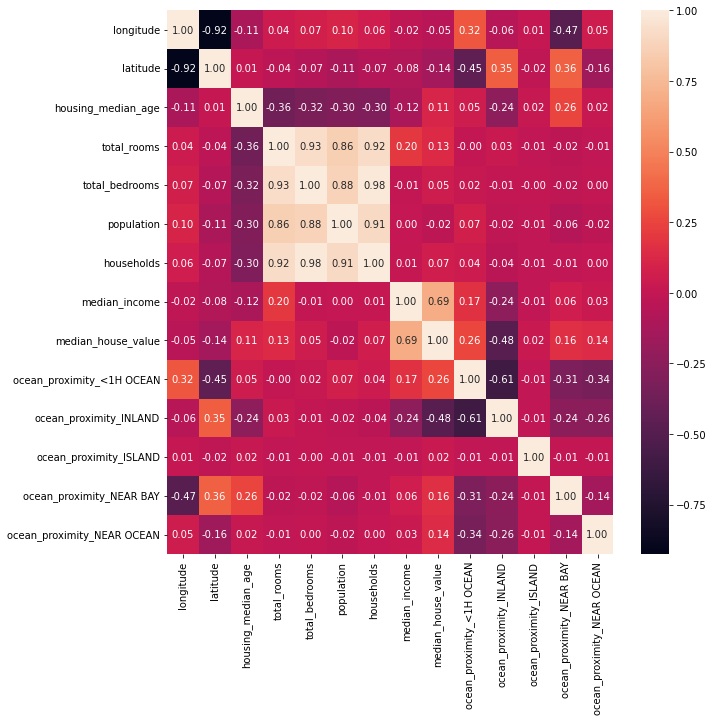

In [13]:
#heatmap
plt.tight_layout()
plt.subplots(figsize=(10,10))
sns.heatmap(ca.corr(), annot=True, fmt='.2f')

In [14]:
# drop household, population columns as they are strongly correlated to total rooms/bedrooms
# drop total rooms, strongly correlated to total bedrooms

In [15]:
ca.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
Xall = ca[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y = ca['median_house_value']

In [17]:
Xall_train, Xall_test, y_train, y_test = train_test_split(Xall, y, random_state = 32, train_size=0.7, test_size=0.3)

In [18]:
# Check best MSEs among all degrees
train_mses = []
test_mses = []

for d in range(1,6):
    #create pipeline with PolynomialFeatures and LinearRegression
    pipe = Pipeline([('features', PolynomialFeatures(degree = d, include_bias = False)), ('model', LinearRegression())])
    #fit on training data
    pipe.fit(Xall_train, y_train)
    
    #mse of training data
    train_mse = mean_squared_error(y_train, pipe.predict(Xall_train))
    train_mses.append(train_mse)
    #mse of testing data
    test_mse = mean_squared_error(y_test, pipe.predict(Xall_test))
    test_mses.append(test_mse)

best_model_complexity = test_mses.index(min(test_mses)) + 1

print(type(best_model_complexity))
print(best_model_complexity)

<class 'int'>
1


The Complexity that minimized Test Error was: 1


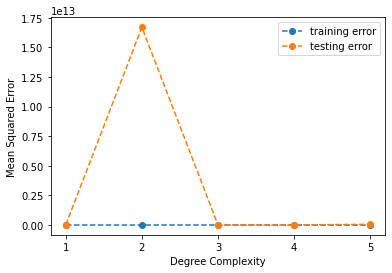

In [19]:
# plot 
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 6), range(1, 6))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend()

In [20]:
test_mses

[4890.524091257272,
 16697180982819.168,
 13730260.365321374,
 2563265.538472204,
 53476957180.40422]

In [21]:
# split data
# do not include 'total_rooms', 

# X = ca[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income',
#        'ocean_proximity_<1H OCEAN',
#        'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
#        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
# y = ca['median_house_value']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, train_size=0.7, test_size=0.3)


In [22]:
# [i for i in X.columns if i!='median_house_value']

In [23]:
# # Check best MSEs among all degrees
# train_mses = []
# test_mses = []

# for d in range(1,6):
#     #create pipeline with PolynomialFeatures and LinearRegression
#     #remember to set include_bias = False
#     #pfeatures = PolynomialFeatures(degree = d, include_bias = False)
#     #model = pfeatures.fit_transform(X[['total_rooms']])
#     pipe = Pipeline([('features', PolynomialFeatures(degree = d, include_bias = False)), ('model', LinearRegression())])
#     #fit on training data
#     pipe.fit(X_train, y_train)
    
#     #mse of training data
#     train_mse = mean_squared_error(y_train, pipe.predict(X_train))
#     train_mses.append(train_mse)
#     #mse of testing data
#     test_mse = mean_squared_error(y_test, pipe.predict(X_test))
#     test_mses.append(test_mse)

# best_model_complexity = test_mses.index(min(test_mses)) + 1

# print(type(best_model_complexity))
# print(best_model_complexity)

In [24]:
# # plot 
# print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
# plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
# plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
# plt.xticks(range(1, 6), range(1, 6))
# plt.xlabel('Degree Complexity')
# plt.ylabel('Mean Squared Error')
# plt.legend()

In [25]:
#test_mses

In [26]:
# fit model with training set
model = LinearRegression().fit(Xall_train, y_train)
# score with test set
model.score(Xall_test, y_test)

0.6334205640890778

In [27]:
# permutation importance
r = permutation_importance(model, Xall_test, y_test, n_repeats = 10, random_state = 32)
r.importances_mean

array([0.44770039, 0.44232519, 0.0269804 , 0.02408259, 0.18291621,
       0.36858329, 0.13117628, 0.82767194, 0.03018423, 0.12937226,
       0.00185126, 0.01347451, 0.00796388])

In [28]:
pd.DataFrame({"Column":Xall.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

,Column,Importance
7,median_income,0.827672
0,longitude,0.447700
1,latitude,0.442325
5,population,0.368583
4,total_bedrooms,0.182916
6,households,0.131176
9,ocean_proximity_INLAND,0.129372
8,ocean_proximity_<1H OCEAN,0.030184
2,housing_median_age,0.026980
3,total_rooms,0.024083


In [29]:
#function to execute permutation importance!
def column_importance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, train_size=0.7, test_size=0.3)
    # fit model with training set
    model = LinearRegression().fit(X_train, y_train)
    # score with test set
    print('model r^2 :', model.score(X_test, y_test))
    # permutation importance
    r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 32)
    print('importance:', r.importances_mean)
    return model, X_test, y_test, pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

In [30]:
Xsub = ca[['longitude', 'latitude', 'housing_median_age',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y = ca['median_house_value']

In [31]:
model, X_test, y_test, ranking = column_importance(Xsub, y)
ranking

model r^2 : 0.6320280840782659
importance: [0.46097192 0.46020921 0.027872   0.08818308 0.41398414 0.14417052
 0.7674889  0.02868423 0.1329452  0.00183072 0.01325799 0.00799126]


,Column,Importance
6,median_income,0.767489
0,longitude,0.460972
1,latitude,0.460209
4,population,0.413984
5,households,0.144171
8,ocean_proximity_INLAND,0.132945
3,total_bedrooms,0.088183
7,ocean_proximity_<1H OCEAN,0.028684
2,housing_median_age,0.027872
10,ocean_proximity_NEAR BAY,0.013258


In [32]:
Xsub = ca[['longitude', 'latitude',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
#y = ca['median_house_value']
model, X_test, y_test, ranking = column_importance(Xsub, y)
ranking

model r^2 : 0.6190712500073372
importance: [0.5440103  0.55084542 0.05575378 0.43848936 0.16436149 0.71367716
 0.03889593 0.17008076 0.00199611 0.01045495 0.01275717]


,Column,Importance
5,median_income,0.713677
1,latitude,0.550845
0,longitude,0.544010
3,population,0.438489
7,ocean_proximity_INLAND,0.170081
4,households,0.164361
2,total_bedrooms,0.055754
6,ocean_proximity_<1H OCEAN,0.038896
10,ocean_proximity_NEAR OCEAN,0.012757
9,ocean_proximity_NEAR BAY,0.010455


In [33]:
# 'households' 98% to bedrooms
Xsub = ca[['longitude', 'latitude', 'housing_median_age',
       'total_bedrooms', 'population', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
#y = ca['median_house_value']
model, X_test, y_test, ranking = column_importance(Xsub, y)
ranking

model r^2 : 0.6342275269087095
importance: [0.51569876 0.5079423  0.02849197 0.34773458 0.30190575 0.7723496
 0.02555422 0.1259973  0.00168399 0.01198549 0.00705683]


,Column,Importance
5,median_income,0.772350
0,longitude,0.515699
1,latitude,0.507942
3,total_bedrooms,0.347735
4,population,0.301906
7,ocean_proximity_INLAND,0.125997
2,housing_median_age,0.028492
6,ocean_proximity_<1H OCEAN,0.025554
9,ocean_proximity_NEAR BAY,0.011985
10,ocean_proximity_NEAR OCEAN,0.007057


In [34]:
# 'households' 98%, 'population' 88% to bedrooms
Xsub = ca[['longitude', 'latitude', 'housing_median_age',
       'total_bedrooms', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
#y = ca['median_house_value']
model, X_test, y_test, ranking = column_importance(Xsub, y)
ranking

model r^2 : 0.6062466065407657
importance: [0.36546261 0.3360461  0.03359454 0.01534838 0.77489564 0.03991865
 0.16654867 0.00227486 0.01182185 0.00693664]


,Column,Importance
4,median_income,0.774896
0,longitude,0.365463
1,latitude,0.336046
6,ocean_proximity_INLAND,0.166549
5,ocean_proximity_<1H OCEAN,0.039919
2,housing_median_age,0.033595
3,total_bedrooms,0.015348
8,ocean_proximity_NEAR BAY,0.011822
9,ocean_proximity_NEAR OCEAN,0.006937
7,ocean_proximity_ISLAND,0.002275


In [51]:
# 'households' 98% to bedrooms
Xsub = ca[['longitude', 'latitude', 'housing_median_age',
       'total_bedrooms', 'population', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
#y = ca['median_house_value']
model, X_test, y_test, ranking = column_importance(Xsub, y)
ranking

model r^2 : 0.6342275269087095
importance: [0.51569876 0.5079423  0.02849197 0.34773458 0.30190575 0.7723496
 0.02555422 0.1259973  0.00168399 0.01198549 0.00705683]


,Column,Importance
5,median_income,0.772350
0,longitude,0.515699
1,latitude,0.507942
3,total_bedrooms,0.347735
4,population,0.301906
7,ocean_proximity_INLAND,0.125997
2,housing_median_age,0.028492
6,ocean_proximity_<1H OCEAN,0.025554
9,ocean_proximity_NEAR BAY,0.011985
10,ocean_proximity_NEAR OCEAN,0.007057


In [36]:
# 'households' 98% to bedrooms
# Xsub = ca[['longitude', 'latitude', 'housing_median_age',
#        'total_bedrooms', 'population', 'median_income',
#         'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
#        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
# #y = ca['median_house_value']
# model, X_test, y_test, ranking = column_importance(Xsub, y)
# ranking

model r^2 : 0.6342275269087096
importance: [0.51569876 0.5079423  0.02849197 0.34773458 0.30190575 0.7723496
 1.02192398 1.32039743 0.41793925 0.42659788]


,Column,Importance
7,ocean_proximity_INLAND,1.320397
6,ocean_proximity_<1H OCEAN,1.021924
5,median_income,0.772350
0,longitude,0.515699
1,latitude,0.507942
9,ocean_proximity_NEAR OCEAN,0.426598
8,ocean_proximity_NEAR BAY,0.417939
3,total_bedrooms,0.347735
4,population,0.301906
2,housing_median_age,0.028492


Text(0.5, 1.0, 'Total Bedrooms vs. Median House Value')

<Figure size 432x288 with 0 Axes>

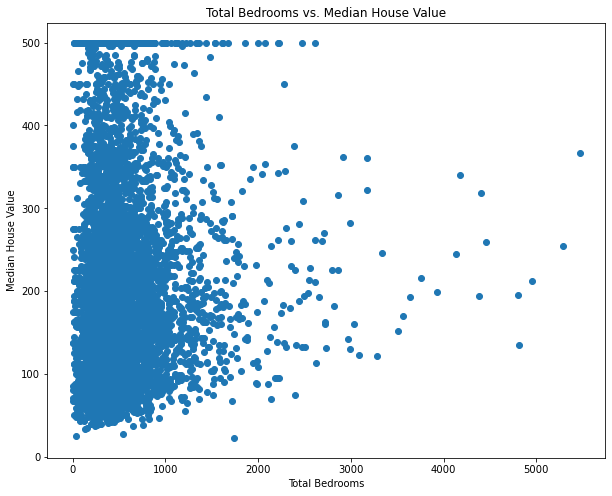

In [53]:
plt.tight_layout()
plt.subplots(figsize=(10,8))
plt.scatter(x=X_test['total_bedrooms'], y = y_test)
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.title('Total Bedrooms vs. Median House Value')

Text(0.5, 1.0, 'Total Bedrooms vs. Median House Value Prediction')

<Figure size 432x288 with 0 Axes>

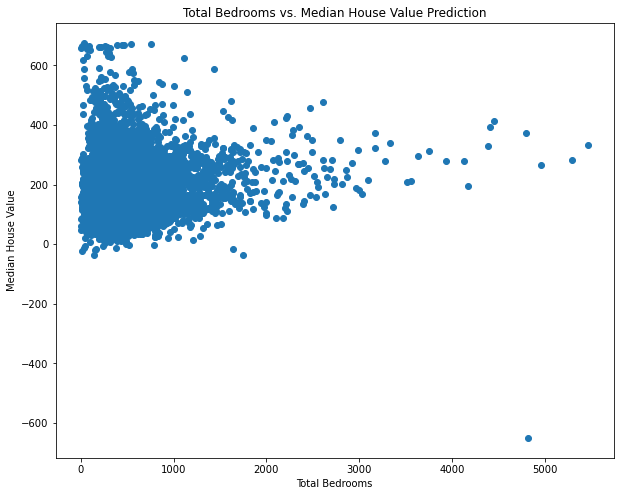

In [54]:
plt.tight_layout()
plt.subplots(figsize=(10,8))
plt.scatter(x=X_test['total_bedrooms'], y = model.predict(X_test))
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.title('Total Bedrooms vs. Median House Value Prediction')

In [39]:
# y_pred = model.predict(Xsub_test)
# metrics.r2_score(y_test, y_pred)

In [40]:
#pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Score", ascending = False)

In [56]:
ca.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [57]:
Xall = ca[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

In [58]:
Xall

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [59]:
Xall_train, Xall_test, y_train, y_test = train_test_split(Xall, y, random_state = 32, train_size=0.7, test_size=0.3)


In [60]:
model = LinearRegression().fit(Xall_train, y_train)

In [61]:
model.score(Xall_test, y_test)

0.6334205640890778

In [62]:
# permutation importance
r = permutation_importance(model, Xall_test, y_test, n_repeats = 10, random_state = 32)
r.importances_mean

array([0.44770039, 0.44232519, 0.0269804 , 0.02408259, 0.18291621,
       0.36858329, 0.13117628, 0.82767194, 0.03018423, 0.12937226,
       0.00185126, 0.01347451, 0.00796388])

In [63]:
y_pred = model.predict(Xall_test)
metrics.r2_score(y_test, y_pred)

0.6334205640890778

In [64]:
pd.DataFrame({"Variable":Xall.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
7,median_income,0.827672
0,longitude,0.447700
1,latitude,0.442325
5,population,0.368583
4,total_bedrooms,0.182916
6,households,0.131176
9,ocean_proximity_INLAND,0.129372
8,ocean_proximity_<1H OCEAN,0.030184
2,housing_median_age,0.026980
3,total_rooms,0.024083


In [67]:
# vif
def vif(columns, data):
  vif_dict = {}

  for col in columns:
    exclude_col = [i for i in columns if i!=col]
    X,y = data[exclude_col], data[col]

    # vif = 1 / (1- R^2)
    r_squared = LinearRegression().fit(X, y).score(X, y)
    if r_squared == 1:
        vif = 0
    else:
        vif = 1 / (1-r_squared)
    vif_dict[col] = vif

  df_vif = pd.DataFrame({"VIF":vif_dict}).sort_values(by = "VIF", ascending = False)
  return df_vif

In [68]:
print("With multicollinearity")
vif(Xall.columns, Xall)

With multicollinearity


,VIF
total_bedrooms,34.641076
households,33.417149
latitude,19.957041
longitude,18.073096
total_rooms,12.977401
population,6.425728
median_income,1.774530
housing_median_age,1.323749
ocean_proximity_<1H OCEAN,0.000000
ocean_proximity_INLAND,0.000000


In [69]:
print("Without multicollinearity")
vif(Xsub.columns, Xsub)

Without multicollinearity


,VIF
latitude,19.563666
longitude,17.651287
total_bedrooms,4.537728
population,4.490968
housing_median_age,1.319310
median_income,1.127569
ocean_proximity_<1H OCEAN,0.000000
ocean_proximity_INLAND,0.000000
ocean_proximity_ISLAND,0.000000
ocean_proximity_NEAR BAY,0.000000
